# 목차

* **1. 이미지 데이터 불러오기**
* **2. 골절 라벨링**
* **3. 각 이미지 데이터 특성 확인**

# 1. 이미지 데이터 불러오기
* 정상과 골절 이미지 데이터가 각각 3366개, 717개로 구성되어 있다.
* 골절 이미지의 라벨링 데이터는 VGG_fracture_masks.json 파일에 들어있다.

In [2]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

normal_dir = '/home/nas/data/eunju/dataset/FracAtlas/images/Non_fractured/'
abnormal_dir = '/home/nas/data/eunju/dataset/FracAtlas/images/Fractured/'

def count_and_display_images(directory):
    image_files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    total_images = len(image_files)
    example_image = image_files[0] if total_images > 0 else None
    return total_images, example_image

normal_count, normal_example = count_and_display_images(normal_dir)
abnormal_count, abnormal_example = count_and_display_images(abnormal_dir)

print("정상 :", normal_count, ", 골절 :", abnormal_count)

정상 : 3366 , 골절 : 717


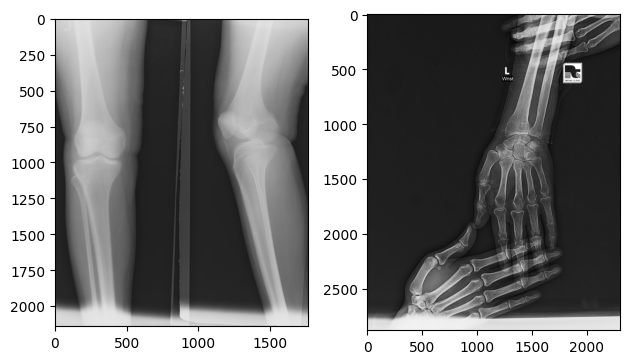

(None, None)

In [3]:
import cv2
plt.subplot(121),plt.imshow(cv2.imread(normal_dir+normal_example))
plt.subplot(122),plt.imshow(cv2.imread(abnormal_dir+abnormal_example))
plt.tight_layout(), plt.show()

# 2. 각 이미지 데이터 특성 확인
* FlacAtlas 폴더 안에 dataset이라는 csv 파일 안에 각 이미지의 특성 정보 나옴.

### 골절 부위
* <u>hand</u> : (ex : IMG0000019.jpg)
* <u>leg</u> : (ex : IMG0000092.jpg)
* <u>hip</u> : (ex : IMG0002180.jpg)
* <u>shoulder</u> : (ex : IMG0002302.jpg)	
* <u>mixed</u> : 여러 부위 골절
    * hand + shoulder : (ex : IMG0000044.jpg)
    * leg + hip : (ex : IMG0000453.jpg)
    * hand + leg : (ex : IMG0002427.jpg)
    * hand + hip : (ex : IMG0000822.jpg)
    * hand + leg + hip : (ex : IMG0002478.jpg)
    * hand + hip + shoulder : (ex : IMG0001730.jpg)
---
### 특징
* <u>hardware</u> : 뼈 고정 금속 여부
* <u>multiscan</u> : X-ray, CT 스캔 등 여러 가지 스캔 방법을 사용하여 얻은 데이터
* <u>fracture</u>  : 골절 여부
* <u>fracture_count</u> : 골절의 개수
---
### 촬영방법
* <u>frontal</u> : 정면 이미지
* <u>lateral</u> : 측면 이미지
* <u>oblique</u> : 사선 이미지

### 2.1 데이터 보기
* 여러 부위가 골절된 경우
* 골절된 부위의 개수가 1~5개
* 여러 촬영 기법을 복합적으로 사용 (X-ray, CT, MRI)
* 여러 방향으로 촬영 (정면, 측면, 사선)

In [46]:
import pandas as pd

data = pd.read_csv("./data/dataset.csv")

data

,image_id,hand,leg,hip,shoulder,mixed,hardware,multiscan,fractured,fracture_count,frontal,lateral,oblique
0,IMG0000000.jpg,0,1,0,0,0,0,1,0,0,1,1,0
1,IMG0000001.jpg,0,1,0,0,0,0,1,0,0,1,1,0
2,IMG0000002.jpg,0,1,0,0,0,0,1,0,0,1,1,0
3,IMG0000003.jpg,0,1,0,0,0,0,1,0,0,0,1,1
4,IMG0000004.jpg,0,1,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4078,IMG0004375.jpg,1,0,0,0,0,0,0,1,1,0,1,0
4079,IMG0004376.jpg,1,0,0,0,0,0,0,1,1,1,0,0
4080,IMG0004383.jpg,0,1,0,0,0,0,0,0,0,1,0,0
4081,IMG0004388.jpg,0,1,0,0,0,0,0,0,0,0,1,0


### 2.2  부위 별 정상, 골절 데이터 수 시각화

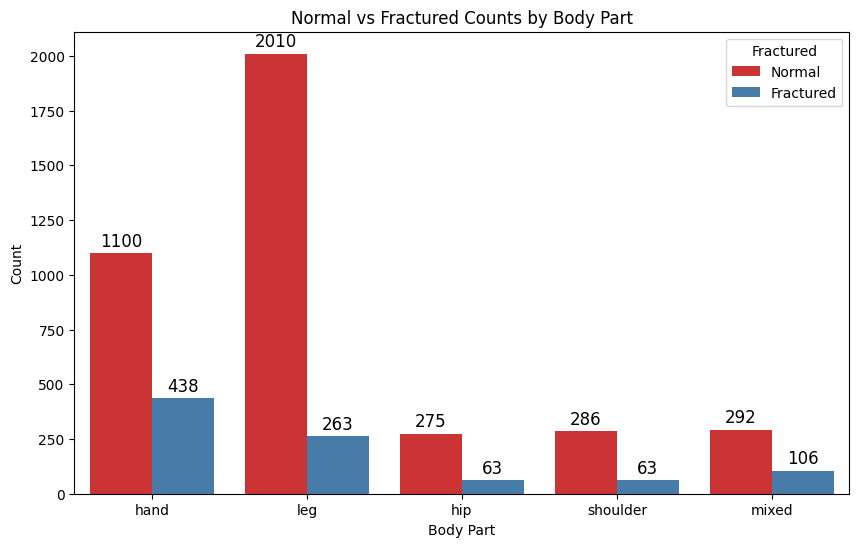

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 예시 데이터 (df가 데이터프레임이라고 가정)
df = pd.DataFrame(df)


# 부위별 골절 여부 확인을 위해 'melt'로 데이터 변환
melted_df = df.melt(id_vars='fractured', value_vars=['hand', 'leg', 'hip', 'shoulder', 'mixed'], 
                    var_name='body_part', value_name='present')

# 'present'가 1인 경우만 필터링
melted_df = melted_df[melted_df['present'] == 1]

# 시각화: 부위별 정상과 골절 수를 바 차트로 표현
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=melted_df, x='body_part', hue='fractured', palette='Set1')

# 각 막대 위에 개수 표시
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Normal vs Fractured Counts by Body Part')
plt.ylabel('Count')
plt.xlabel('Body Part')
plt.legend(title='Fractured', labels=['Normal', 'Fractured'])
plt.show()

### 2.3 골절 수에 따른 분포
* 골절 수가 5개인 사람의 골절을 보고 싶어 밑에 출력

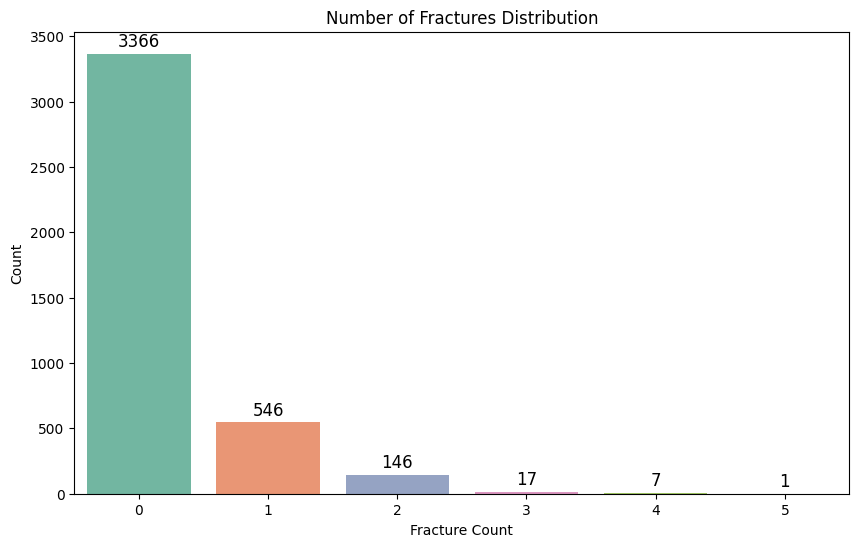

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 시각화: fracture_count에 따른 골절 개수 분포를 바 차트로 표현
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='fracture_count', palette='Set2')

# 각 막대 위에 개수 표시
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Number of Fractures Distribution')
plt.ylabel('Count')
plt.xlabel('Fracture Count')
plt.show()

**무려 5곳이나 골절된 다리의 영상**
* 아래 get_polygon_from_json, visualize_labeled_image 함수 실행하고 돌려야 함.

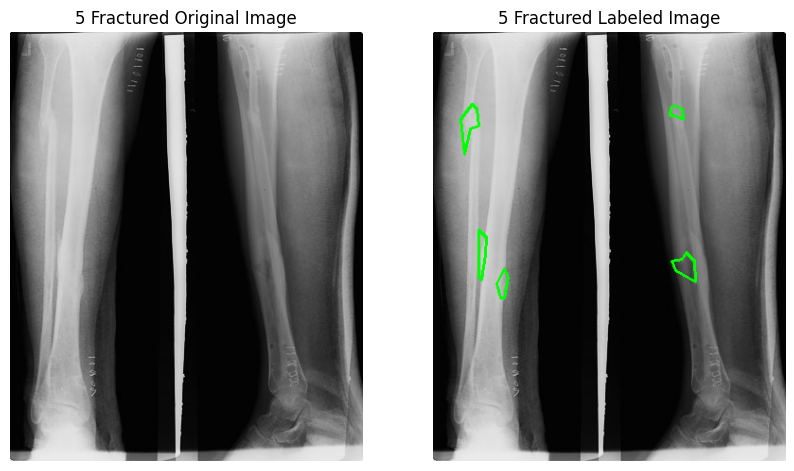

In [132]:
# df[df["fracture_count"] == 5]

image_path = '/home/nas/data/eunju/dataset/FracAtlas/images/Fractured/IMG0002572.jpg'
polygons = get_polygon_from_json(json_data, "IMG0002572.jpg")
visualize_labeled_image(image_path, polygons, 2, "5 Fractured Original Image", "5 Fractured Labeled Image" )

# 3. 골절 라벨링

### 3.1 Labeling JSON 파일 불러오기
* VGG_fracture_masks.json 파일에 골절 이미지의 골절 부분 좌표 나와있음.

In [1]:
import json

with open("./data/VGG_fracture_masks.json", "r") as f:
    json_data = json.load(f)

### 3.2 각 데이터에 골절 부분 표시
* <span style='background-color: #fff5b1'>Segmentation을 위한 Labeling 작업</span>

In [77]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import json

# 라벨링 데이터 파싱
def get_polygon_from_json(json_data, image_filename):
    regions = json_data[image_filename]["regions"]
    polygons = []
    
    for region_id, region_info in regions.items():
        shape_attributes = region_info["shape_attributes"]
        if shape_attributes["name"] == "polygon":
            x_coords = shape_attributes["all_points_x"]
            y_coords = shape_attributes["all_points_y"]
            polygons.append((x_coords, y_coords))
    
    return polygons

# 이미지에 라벨링된 영역의 테두리만 시각화하는 함수
def visualize_labeled_image(image_path, polygons, n, left_title, right_title):
    # 이미지를 읽어오기
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR로 읽어오기 때문에 RGB로 변환
    
    # 시각화를 위해 이미지 복사
    image_with_labels = image_rgb.copy()
    
    # 다각형 영역의 테두리만 색상 적용
    for x_coords, y_coords in polygons:
        pts = np.array([list(zip(x_coords, y_coords))], dtype=np.int32)
        cv2.polylines(image_with_labels, pts, isClosed=True, color=(0, 255, 0), thickness=n)  # 녹색 테두리

    # 결과 이미지 시각화
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.title(left_title)
    plt.imshow(image_rgb)
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.title(right_title)
    plt.imshow(image_with_labels)
    plt.axis('off')
    
    plt.show()

### 3.2.1 기본적인 부위
* hand / leg / hip / shoulder

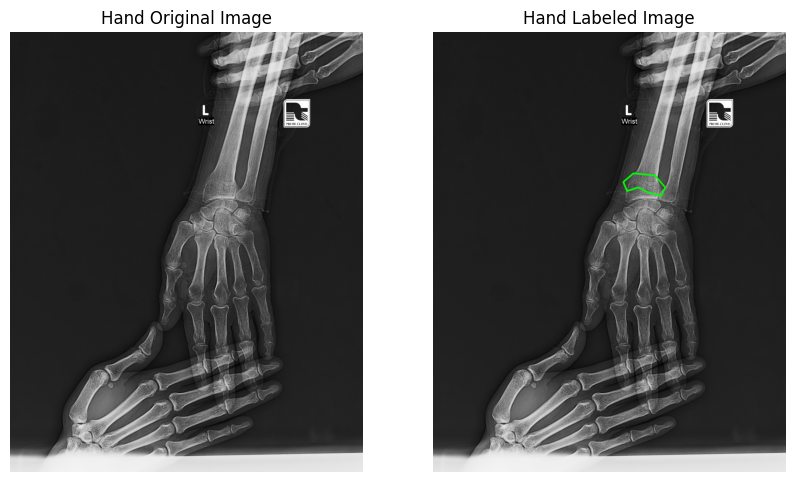

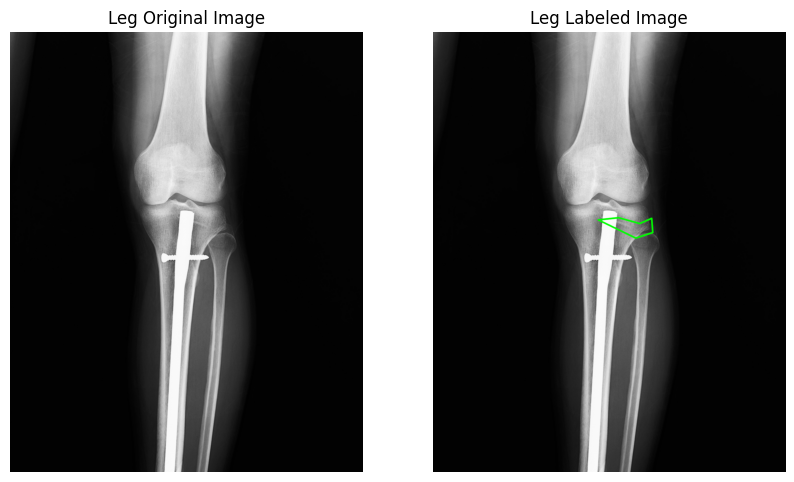

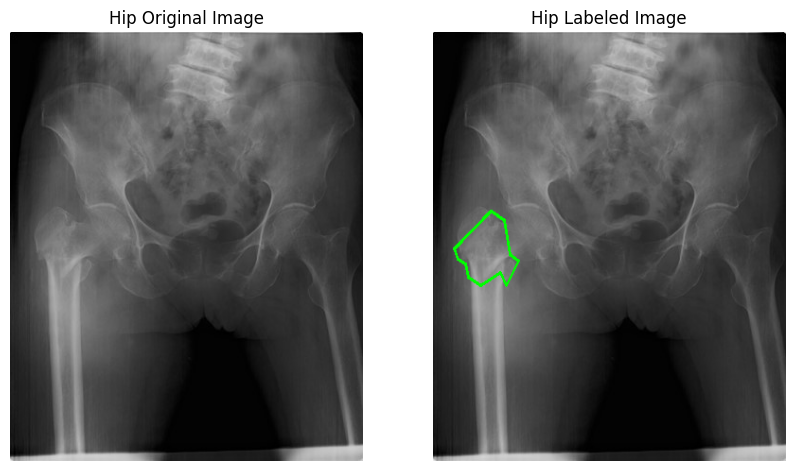

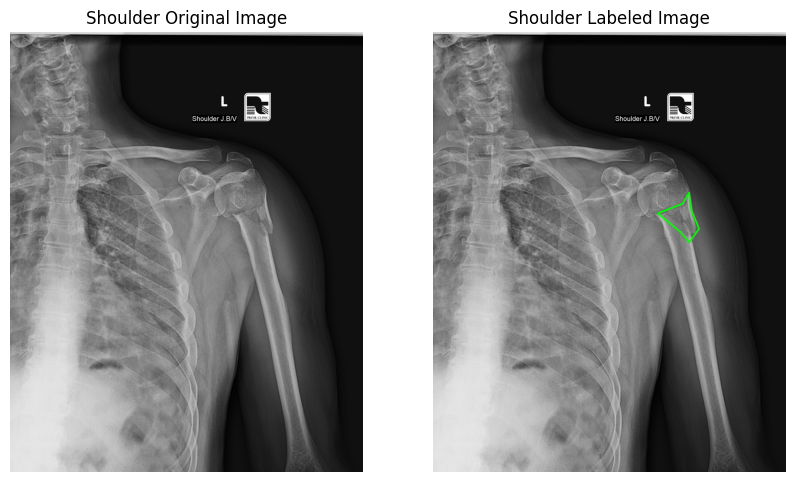

In [100]:
# hand example
image_path = '/home/nas/data/eunju/dataset/FracAtlas/images/Fractured/IMG0000019.jpg'
polygons = get_polygon_from_json(json_data, "IMG0000019.jpg")
visualize_labeled_image(image_path, polygons, 10, "Hand Original Image", "Hand Labeled Image" )

# leg example
image_path = '/home/nas/data/eunju/dataset/FracAtlas/images/Fractured/IMG0000092.jpg'
polygons = get_polygon_from_json(json_data, "IMG0000092.jpg")
visualize_labeled_image(image_path, polygons, 10, "Leg Original Image", "Leg Labeled Image" )

# hip example
image_path = '/home/nas/data/eunju/dataset/FracAtlas/images/Fractured/IMG0002180.jpg'
polygons = get_polygon_from_json(json_data, "IMG0002180.jpg")
visualize_labeled_image(image_path, polygons, 2, "Hip Original Image", "Hip Labeled Image" )

# shoulder example
image_path = '/home/nas/data/eunju/dataset/FracAtlas/images/Fractured/IMG0002302.jpg'
polygons = get_polygon_from_json(json_data, "IMG0002302.jpg")
visualize_labeled_image(image_path, polygons, 10, "Shoulder Original Image", "Shoulder Labeled Image" )

### 3.2.2 특수 부위
* hand + shoulder / leg + hip / hand + leg / hand + hip / hand + leg + hip / hand + hip + shoulder
* 어느 한 쪽이 골절이 되었지만 촬영시 두 부분이 같이 나온 경우

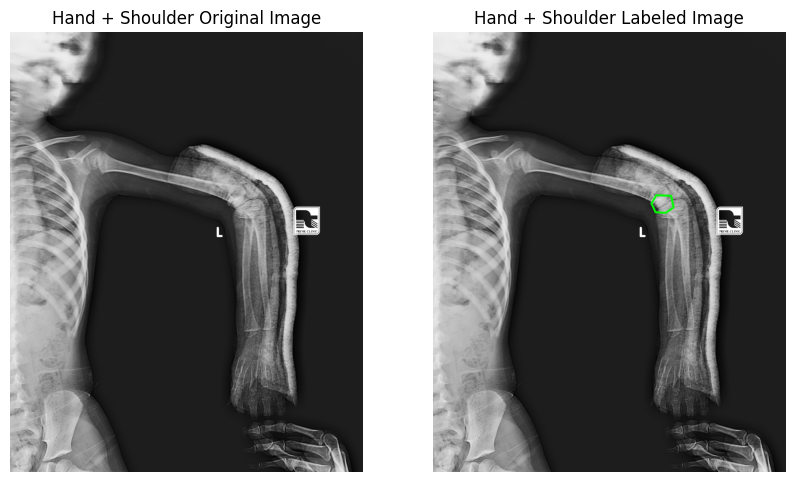

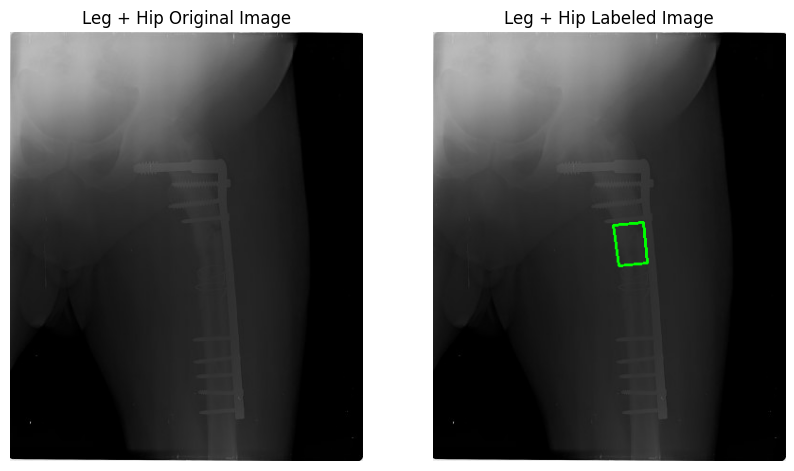

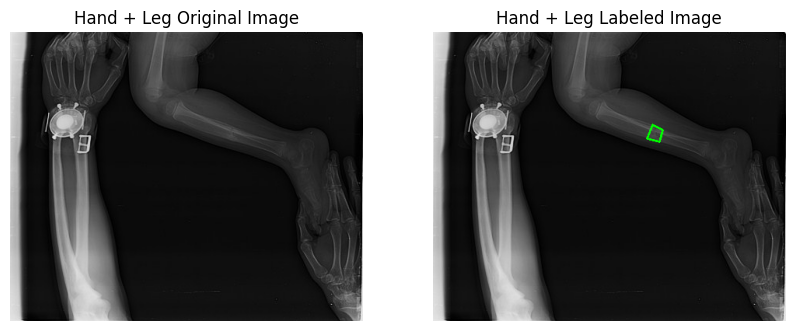

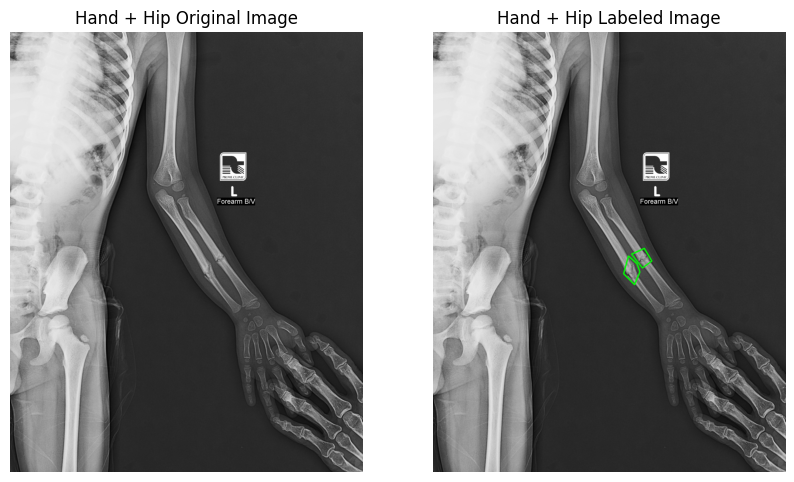

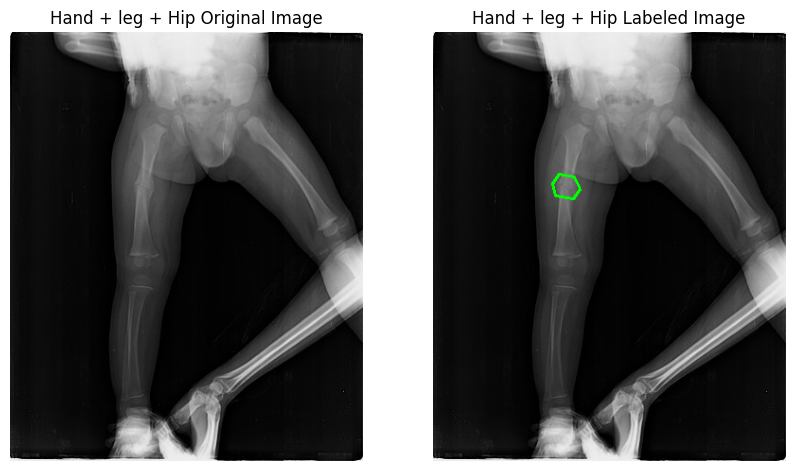

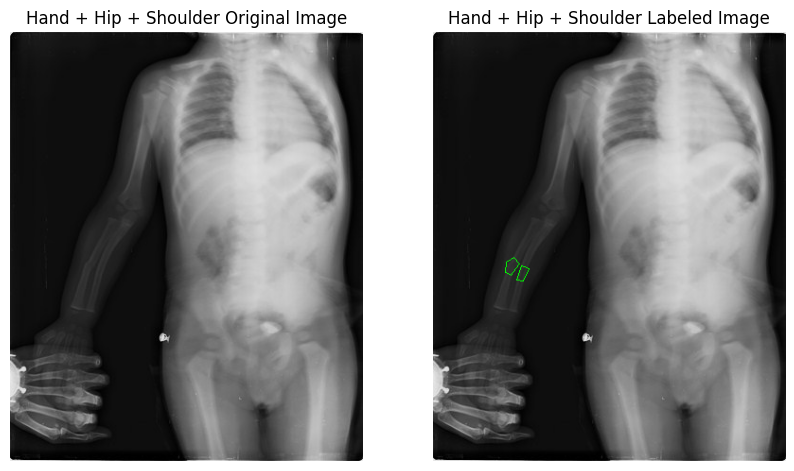

In [121]:
# hand + shoulder example
image_path = '/home/nas/data/eunju/dataset/FracAtlas/images/Fractured/IMG0000044.jpg'
polygons = get_polygon_from_json(json_data, "IMG0000044.jpg")
visualize_labeled_image(image_path, polygons, 12, "Hand + Shoulder Original Image", "Hand + Shoulder Labeled Image" )

# leg + hip example
image_path = '/home/nas/data/eunju/dataset/FracAtlas/images/Fractured/IMG0000453.jpg'
polygons = get_polygon_from_json(json_data, "IMG0000453.jpg")
visualize_labeled_image(image_path, polygons, 2, "Leg + Hip Original Image", "Leg + Hip Labeled Image" )

# hand + leg example
image_path = '/home/nas/data/eunju/dataset/FracAtlas/images/Fractured/IMG0002427.jpg'
polygons = get_polygon_from_json(json_data, "IMG0002427.jpg")
visualize_labeled_image(image_path, polygons, 2, "Hand + Leg Original Image", "Hand + Leg Labeled Image" )

#  hand + hip example
image_path = '/home/nas/data/eunju/dataset/FracAtlas/images/Fractured/IMG0002318.jpg'
polygons = get_polygon_from_json(json_data, "IMG0002318.jpg")
visualize_labeled_image(image_path, polygons, 8, "Hand + Hip Original Image", "Hand + Hip Labeled Image" )

# hand + leg + hip example
image_path = '/home/nas/data/eunju/dataset/FracAtlas/images/Fractured/IMG0002478.jpg'
polygons = get_polygon_from_json(json_data, "IMG0002478.jpg")
visualize_labeled_image(image_path, polygons, 2, "Hand + leg + Hip Original Image", "Hand + leg + Hip Labeled Image" )

# hand + hip + shoulder example
image_path = '/home/nas/data/eunju/dataset/FracAtlas/images/Fractured/IMG0001730.jpg'
polygons = get_polygon_from_json(json_data, "IMG0001730.jpg")
visualize_labeled_image(image_path, polygons, 1, "Hand + Hip + Shoulder Original Image", "Hand + Hip + Shoulder Labeled Image" )